Visualization of Features

In [3]:
import numpy as np
import numpy as np
import librosa
import matplotlib.pyplot as plt
from scipy.fftpack import fft
from scipy import signal

In [9]:
# Parameters
Wl = 1024
N = 10
Wn = 0.45

In [6]:
def window(x,sr):
    offset = np.random.randint(0,sr-Wl)
    return x[offset:offset+Wl]

In [15]:
wav_f,sr_f = librosa.load('female.wav',sr=16000)
wav_m,sr_m = librosa.load('male.wav',sr=16000)

wav_f = window(wav_f,sr_f)
wav_m = window(wav_m,sr_m)

In [16]:
#Computing FFT

f_f = np.log(np.abs(fft(wav_f)))
f_m = np.log(np.abs(fft(wav_m)))

f_f = f_f[512:]
f_m = f_m[512:]
f_f = f_f / np.linalg.norm(f_f)
f_m = f_m / np.linalg.norm(f_m)


In [17]:
# Filter

b,a = signal.butter(N,Wn,btype='low',output='ba') 

filteredf = signal.lfilter(b,a,f_f)
filteredm = signal.lfilter(b,a,f_m)

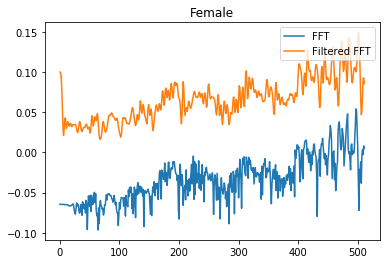

In [22]:
# Plot
freq = np.arange(512)

plt.plot(freq,f_f,label='FFT')
plt.plot(freq,filteredf+0.1,label='Filtered FFT')
plt.title('Female')
plt.legend(loc=1)

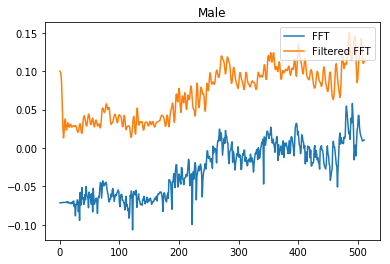

In [23]:
plt.plot(freq,f_m,label='FFT')
plt.plot(freq,filteredm+0.1,label='Filtered FFT')
plt.title('Male')
plt.legend(loc=1)